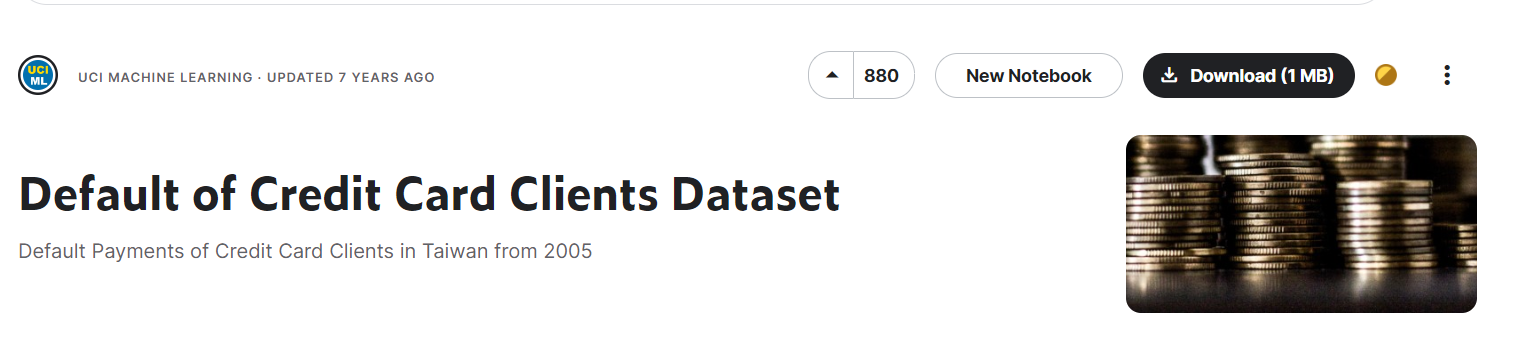


##  Data    
<a href="https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients">UCI Machine Learning</a>,   <a href="https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset">Kaggle</a>
    

## Objectives

After completing this lab you will be able to:

* Use <a href="https://snapml.readthedocs.io/en/latest/decision_trees.html">IBM snapML</a> Decision Tree to classify default or not


## **Additional Information**

This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.<br>

Content
There are 25 variables:

ID: ID of each client <br>
LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit<br>
SEX: Gender (1=male, 2=female)<br>
EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)<br>
MARRIAGE: Marital status (1=married, 2=single, 3=others)<br>
AGE: Age in years<br>
PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above) <br>
PAY_2: Repayment status in August, 2005 (scale same as above) <br>
PAY_3: Repayment status in July, 2005 (scale same as above) <br>
PAY_4: Repayment status in June, 2005 (scale same as above)  <br>
PAY_5: Repayment status in May, 2005 (scale same as above)   <br>
PAY_6: Repayment status in April, 2005 (scale same as above)   <br>
BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar) <br>
BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)  <br>
BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)  <br>
BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)  <br>
BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)  <br>
BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar) <br>
PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar) <br>
PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)  <br>
PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)  <br>
PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)  <br>
PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)  <br>
PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)  <br>
default.payment.next.month: Default payment (1=yes, 0=no)  <br>

<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#load_dataset">Load the Default of Credit Card Clients data</a></li>
        <li><a href="#modeling">Modeling</a></li>
        <li><a href="#evaluation">Evaluation</a></li>
        <li><a href="#practice">Practice</a></li>
    </ol>
</div>
<br>
<hr>


## import packages


In [1]:
#pip install --upgrade pip

In [2]:
#!pip install snapml

In [3]:
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns
import scipy.optimize as opt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import roc_auc_score
%matplotlib inline 
import matplotlib.pyplot as plt

# dealing with imbalance classes
from imblearn.over_sampling import SMOTE
from collections import Counter

# suppress warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Load Data From CSV File  


In [4]:
credit_default_df = pd.read_csv("default of credit card clients.csv")
credit_default_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
# shape
credit_default_df.shape

(30000, 25)

## Basic EDA

In [6]:
# check the columns
credit_default_df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [7]:
# data types
credit_default_df.dtypes

ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

In [8]:
# missing values
credit_default_df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [9]:
# value count of the default to see if we are dealing with a balanced or unbalanced dataset
credit_default_df['default payment next month'].value_counts(normalize=True)

0    0.7788
1    0.2212
Name: default payment next month, dtype: float64

**Outcome column** : is unbalance with not-default making 77.88% of the data set and default 22.12%.

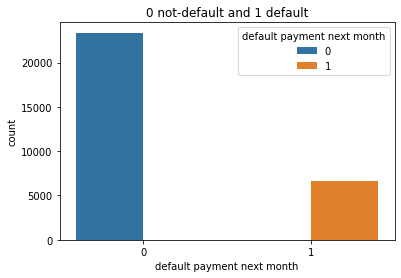

In [10]:
# now let's visualize the outcome
sns.countplot(data=credit_default_df , x='default payment next month', hue='default payment next month').set(title = "0 not-default and 1 default");

## Data pre-processing and selection


In [11]:
# let's drop useless column like the id, and sex because we don't want our model to make prediction based on gender
credit_default_df.drop(['ID','SEX'], axis = 1, inplace = True) 

In [12]:
# check if the id has been dropped
credit_default_df.columns

Index(['LIMIT_BAL', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3',
       'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

### Assign y(target) and X(input/features):

In [13]:
# target value
y =  credit_default_df['default payment next month']

In [14]:
# let's drop the 'default payment next month' column
credit_default_df.drop(['default payment next month'], axis = 1, inplace = True) 

In [15]:
# you see we have deleted the target column(default payment next month)
credit_default_df.columns

Index(['LIMIT_BAL', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3',
       'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

## Train/Test dataset


We split our dataset into train and test set:


In [16]:
X = credit_default_df.copy()
y = y.copy()

In [17]:
X.columns

Index(['LIMIT_BAL', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3',
       'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

In [18]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4, stratify=y)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (24000, 22) (24000,)
Test set: (6000, 22) (6000,)


## Feature scaling


In [19]:
scaler = StandardScaler() # scaler objecy
X_train = scaler.fit_transform(X_train.to_numpy()) # allow the scaler object to learn the features and transform the training data
X_test =  scaler.transform(X_test.to_numpy()) # apply the learned features on the test set

In [20]:
# scaled x_train
X_train = np.asarray(X_train)
X_train.shape 

(24000, 22)

In [21]:
# scaled x_test
X_test = np.asarray(X_test)
X_test.shape 

(6000, 22)

<div id="svm_snap">
    <h2>Build a RandomForest model with Snap ML</h2>
</div>


In [22]:
%%time
# import the RandomForest from Snap ML
from snapml import RandomForestClassifier as SnapForest

# in contrast to scikit-learn's LinearSVC, Snap ML offers multi-threaded CPU/GPU training of RandomForest
# to use the GPU, set the use_gpu parameter to True
# rf = SnapForest(class_weight='balanced', random_state=25, use_gpu=True, fit_intercept=False)

# to set the number of threads used at training time, one needs to set the n_jobs parameter
rf = SnapForest(n_estimators=10, criterion='gini', 
                            max_depth=4, min_samples_leaf=1, 
                            max_features='auto', bootstrap=True, 
                            n_jobs=1, random_state=None, verbose=False, 
                            use_histograms=False, hist_nbins=256, 
                            use_gpu=False, gpu_ids=[0], 
                            compress_trees=False)

# train an SVM model using Snap ML
clf = rf.fit(X_train, y_train)

CPU times: total: 312 ms
Wall time: 549 ms


After being fitted, the model can then be used to predict new values:


In [23]:
yhat = clf.predict(X_test)
yhat [0:5]

array([0, 0, 0, 0, 0], dtype=int64)

<h2 id="evaluation">Evaluation</h2>


In [24]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [25]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      4673
           1       0.68      0.31      0.43      1327

    accuracy                           0.81      6000
   macro avg       0.75      0.64      0.66      6000
weighted avg       0.80      0.81      0.79      6000

Confusion matrix, without normalization
[[4474  199]
 [ 912  415]]


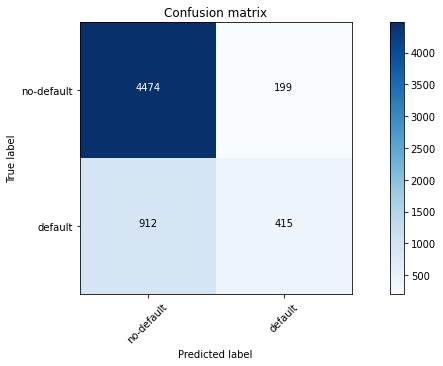

In [26]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat)
#np.set_printoptions(precision=2)

print (classification_report(y_test, yhat,labels=np.unique(yhat)))

# Plot non-normalized confusion matrix
plt.figure(figsize=(11,5))
plot_confusion_matrix(cnf_matrix, ['no-default','default'],normalize= False,  title='Confusion matrix')

You can also easily use the __f1_score__ from sklearn library:


In [27]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.7873865757717258

Let's try the jaccard index for accuracy:


In [28]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat)

0.27195281782437747

### Pickle the model:

We'll pickle the model so we don't have to refit it every time we run this notebook. Remember, there are three steps:

   1. Define the path to the location where it will save
   2. Write the file (i.e., save the model)
   3. Read the model back in

In [29]:
# This module lets us save our models once we fit them.
import pickle

# Pickle the model
with open('Taiwan_Default_CC(RF-snapML).pickle', 'wb') as to_write:
    pickle.dump(rf, to_write) 

In [30]:
# Open pickled model
with open('Taiwan_Default_CC(RF-snapML).pickle', 'rb') as to_read:
    rf_snapML = pickle.load(to_read)

<h2 id="practice">Practice</h2>
Now use a <a href="https://snapml.readthedocs.io/en/latest/boosting_machines.html">Boosting Machine Classifier</a> to see how the decision change.

### Boosting Machine Classifier

In [31]:
%%time
# import the BoostingMachineClassifier from Snap ML
from snapml import BoostingMachineClassifier as BoostMachine

Booting_clf = BoostMachine(n_jobs=1, num_round=100, max_depth=4, 
                                 min_max_depth=1, max_max_depth=5, early_stopping_rounds=10, 
                                 random_state=0, base_score=None, learning_rate=0.1, verbose=False, 
                                 compress_trees=False, class_weight=None, use_histograms=True, 
                                 hist_nbins=256, use_gpu=False, gpu_ids=[0], colsample_bytree=1.0,
                                 subsample=1.0, lambda_l2=0.0, 
                                 tree_select_probability=1.0, regularizer=1.0,
                                 fit_intercept=False, gamma=1.0, n_components=10)


Booting_clf.fit(X_train, y_train) 
yhat2 = Booting_clf.predict(X_test)
# print the F1-score and jaccard_score
print("Avg F1-score: %.4f" % f1_score(y_test, yhat2, average='weighted'))
print("Jaccard score: %.4f" % jaccard_score(y_test, yhat2))

Avg F1-score: 0.7932
Jaccard score: 0.2941
CPU times: total: 594 ms
Wall time: 950 ms


              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4673
           1       0.66      0.35      0.45      1327

    accuracy                           0.82      6000
   macro avg       0.75      0.65      0.67      6000
weighted avg       0.80      0.82      0.79      6000

Confusion matrix, without normalization
[[4436  237]
 [ 867  460]]


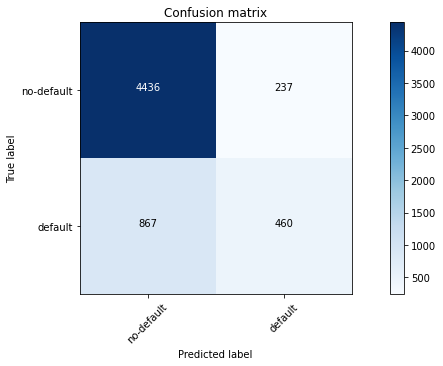

In [32]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat2)
#np.set_printoptions(precision=2)

print (classification_report(y_test, yhat2,labels=np.unique(yhat2)))

# Plot non-normalized confusion matrix
plt.figure(figsize=(11,5))
plot_confusion_matrix(cnf_matrix, classes=['no-default','default'],normalize= False,  title='Confusion matrix')

### Save the boosting machine model:

In [33]:
# This module lets us save our models once we fit them.
import pickle

# Pickle the model
with open('Taiwan_Default_CC(Boost-snapML).pickle', 'wb') as to_write:
    pickle.dump(Booting_clf, to_write) 

In [34]:
# Open pickled model
with open('Taiwan_Default_CC(Boost-snapML).pickle', 'rb') as to_read:
    boosting_snapML = pickle.load(to_read)

### Thank you for completing this lab!

